In [ ]:
# library & dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# plot
dadosB = pd.DataFrame()
n_features = 5
A = 'A2'
for f in range(1, 11):
  dados  = pd.read_csv(f'dadosImagens - {n_features*f}features.csv')
  dadosB = dadosB.append (dados[dados['Modelo'] == A ])
  dadosB = dadosB.reset_index(drop=True)
  dadosB = dadosB.replace({A : f'{A}-{f*5}'})

sns.set_style('ticks')
fig1, ax1 = plt.subplots()
# the size of A4 paper fig.set_size_inches(11.7, 8.27)
fig1.set_size_inches(11.7, 6.27)

image = sns.boxplot( x=dadosB["Modelo"], y=dadosB["Tempo"], fliersize=5)
ax1.set_xlabel('Modelo', fontsize=14)
ax1.set_ylabel('Tempo (ms)', fontsize=14)

sns.despine()
fig1.savefig(f'TempoInferenciaModelo{A}-Extendido.pdf') 

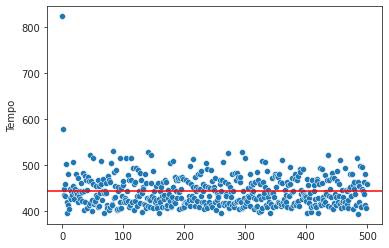

In [ ]:
## gerar Tempo x amostras de um modelo especifico

# dados  = pd.read_csv(f'dadosImagens - 25features.csv')
# dadosB = dados[dados['Modelo'] == 'A2']
# dadosB = dadosB.reset_index(drop=True)
# plt.axhline(y=dadosB.Tempo.mean(),
#             color='red')
# sns.scatterplot(x=dadosB.index, y=dadosB["Tempo"])


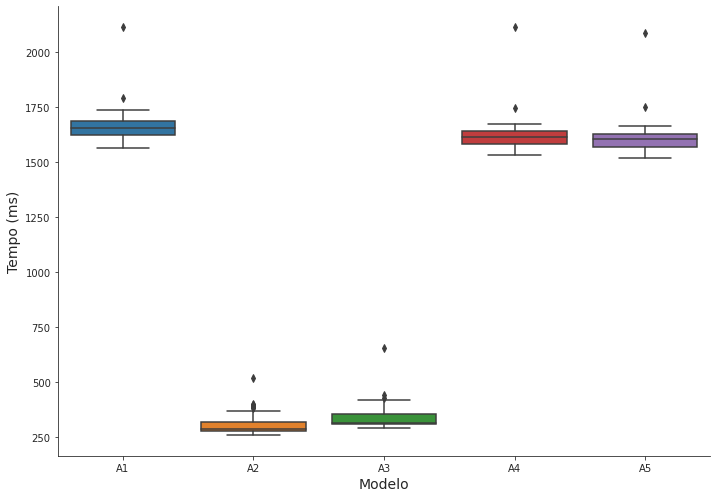

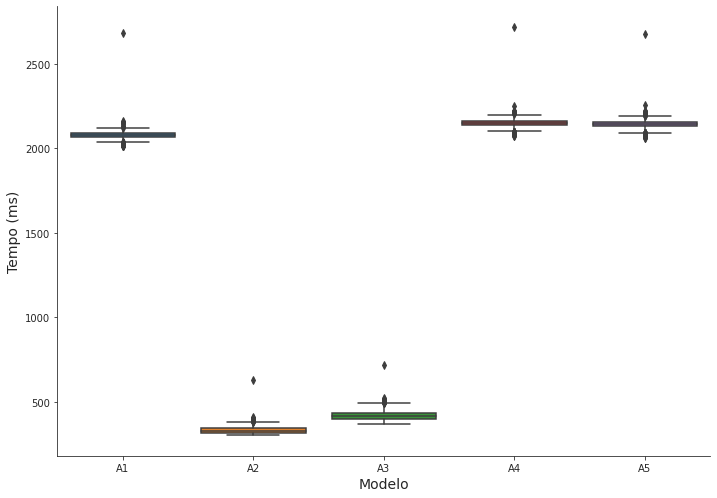

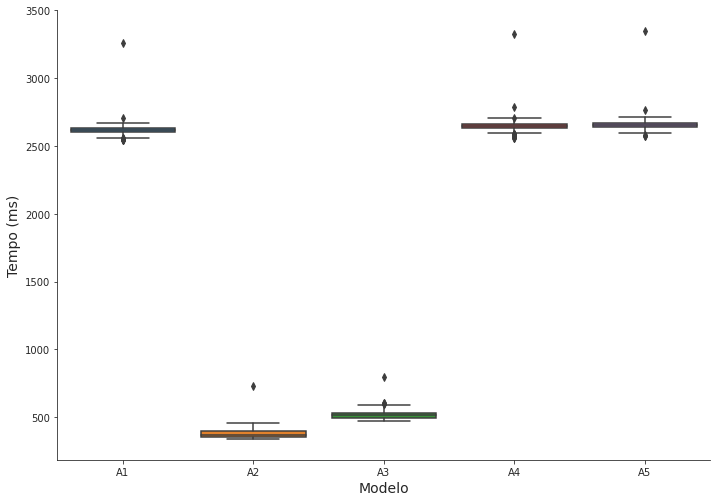

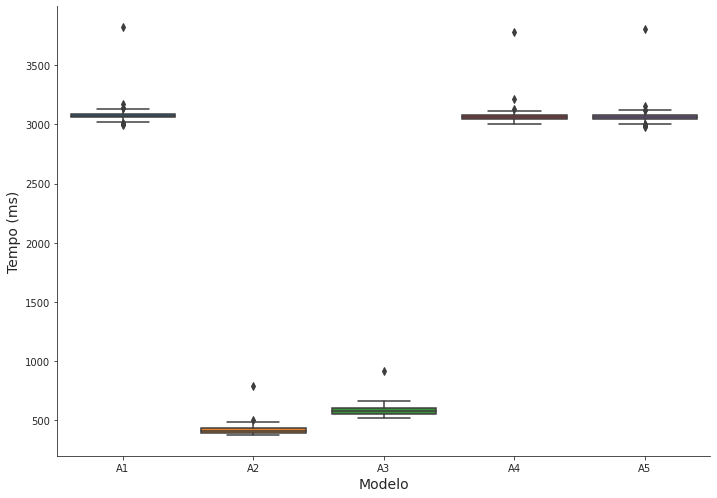

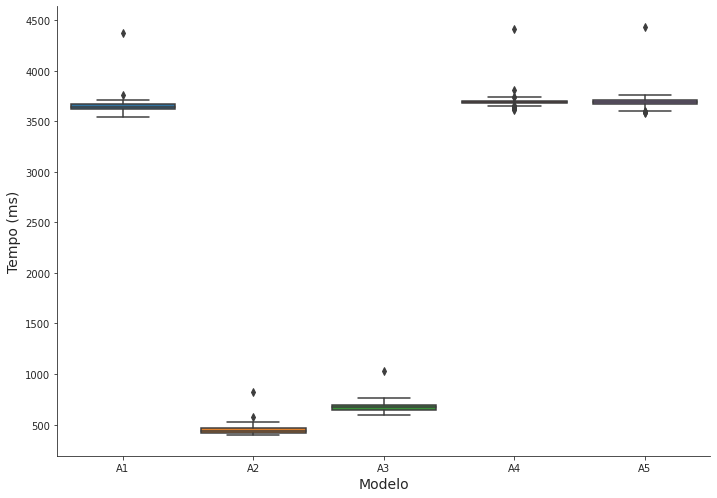

In [ ]:
## gerar imagens por teste de features com todos os modelos
# plot
for f in range(1, 6):
  dados  = pd.read_csv(f'dadosImagens - {n_features*f}features.csv')
  sns.set_style('ticks')
  fig, ax = plt.subplots() 
  # the size of A4 paper fig.set_size_inches(11.7, 8.27)
  fig.set_size_inches(11.7, 8.27)
  ax.set_xlabel('Modelo', fontsize=14)
  ax.set_ylabel('Tempo (ms)', fontsize=14)
  image = sns.boxplot( x=dados["Modelo"], y=dados["Tempo"], fliersize=5, )

  sns.despine()
  fig.savefig(f'TempoInferencia{n_features*f}features.pdf') 

In [ ]:
# image.set_xlabel("X Label",fontsize=30)
# image.set_ylabel("Y Label",fontsize=20)
# image.tick_params(labelsize=5)
# plt.show()

Gerar imagens da matriz confusão 

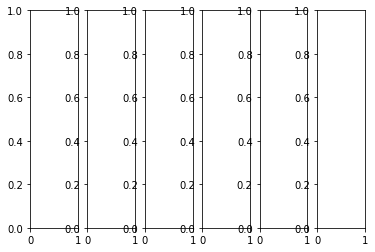

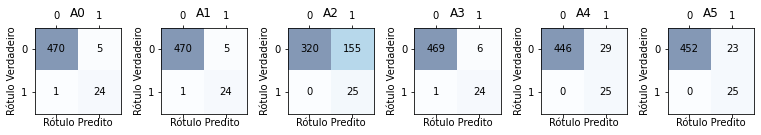

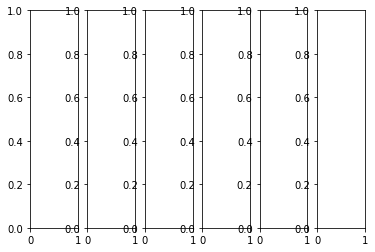

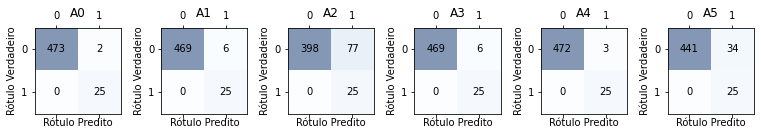

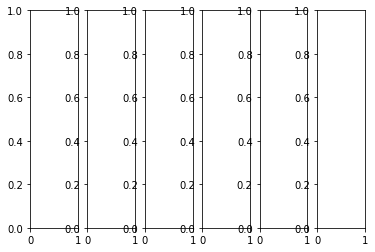

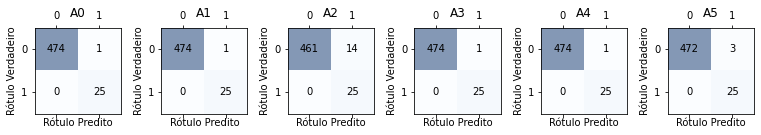

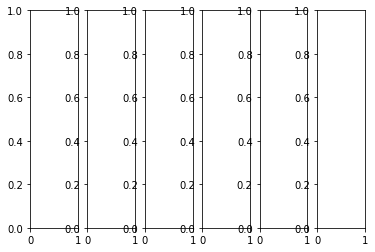

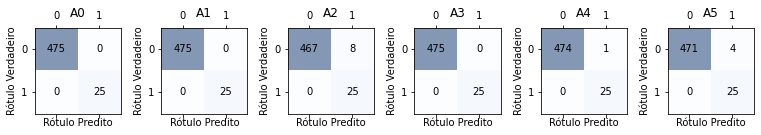

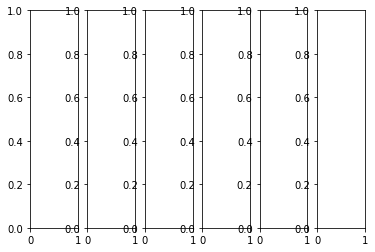

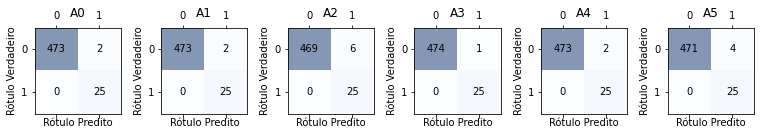

In [ ]:
for f in range(1,6):
  cm_list = []
  dados  = pd.read_csv(f'c2f{n_features*f}.csv')
  y_test = dados['RótuloVerdadeiro']

  fig, axs = plt.subplots(1,6)
  for i in range(0,6):
    if i ==0:
      y_pred =  dados['InferenciaPC']
      cf_matrix = confusion_matrix(y_test, y_pred)
      cm_list.append(cf_matrix)
    else:
      y_pred =  dados[f'A{i}Rotulo']
      cf_matrix = confusion_matrix(y_test, y_pred)
      cm_list.append(cf_matrix)

  fig, axs = plt.subplots(1,6)
  fig.set_size_inches(10.7, 1.80)
  for idx, ax in enumerate(axs.flat):
      ax.matshow(cm_list[idx], cmap = plt.cm.Blues, alpha = 0.5)
      ax.set_title('A%d' % (idx), fontsize=12)
      ax.set_xlabel('Rótulo Predito', fontsize=10)
      ax.set_ylabel('Rótulo Verdadeiro', fontsize=10)
      for i in range(cm_list[idx].shape[0]):
          for j in range(cm_list[idx].shape[1]):
              ax.text(x=j, y=i, s=cm_list[idx][i,j], va='center', ha='center')

  plt.tight_layout()
  fig.savefig(f'MatrizConfusao{n_features*f}features.pdf') 

In [ ]:
n_features = 5
df1 = pd.DataFrame()
for f in range(1,6):
  cm_list = []
  dados  = pd.read_csv(f'c2f{n_features*f}.csv')
  y_test = dados['RótuloVerdadeiro']

  # fig, axs = plt.subplots(1,5)
  for i in range(1,6):
    y_pred =  dados[f'A{i}Rotulo']
    cf_matrix = report = classification_report(y_test, y_pred, output_dict=True)
    #print(f'F={n_features*f} e A{i}Rotulo \n',cf_matrix)
    #cm_list.append(cf_matrix)
    df = pd.DataFrame(cf_matrix).transpose()
    df1 = pd.concat([df, df1])


  # fig, axs = plt.subplots(1,5)
  # fig.set_size_inches(11.7, 8.27)
  # for idx, ax in enumerate(axs.flat):
  #     ax.matshow(cm_list[idx], cmap = plt.cm.Blues, alpha = 0.5)
  #     ax.set_title('A%d' % (idx), fontsize=12)
  #     ax.set_xlabel('Rótulo Predito', fontsize=10)
  #     ax.set_ylabel('Rótulo Verdadeiro', fontsize=10)
  #     for i in range(cm_list[idx].shape[0]):
  #         for j in range(cm_list[idx].shape[1]):
  #             ax.text(x=j, y=i, s=cm_list[idx][i,j], va='center', ha='center')

  # plt.tight_layout()
  # fig.savefig(f'MatrizConfusao{n_features*f}features.png')
df1.to_csv(f'{n_features}X_train_features_{n_features}.csv', sep=',', index=False)

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,1.000000,0.991579,0.995772,475.000
1,0.862069,1.000000,0.925926,25.000
accuracy,0.992000,0.992000,0.992000,0.992
macro avg,0.931034,0.995789,0.960849,500.000
weighted avg,0.993103,0.992000,0.992279,500.000


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
a = precision_recall_fscore_support(y_test, y_pred)
a

(array([1.        , 0.86206897]),
 array([0.99157895, 1.        ]),
 array([0.99577167, 0.92592593]),
 array([475,  25]))